In [1]:
pip install numpy pandas scikit-learn xgboost imbalanced-learn pywavelets


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pywt  # For DWT
from scipy.fftpack import fft  # For DFT


In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv")
print(df.head())  # Check if the dataset loaded correctly


   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0   0.005528   0.140723   0.294396   0.655918   0.792991   0.962426   
1   0.156458   0.376323   0.516422   0.840747   0.944938   1.163505   
2  -0.045292   0.459395   0.428857   0.518493   0.803600   0.878230   
3  -0.011586   0.342743   0.399322   0.743780   0.891704   0.940424   
4  -0.325932   0.787330   0.842257   0.525164   0.762247  -0.194175   

   Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_248  Channel_249  \
0   0.963425   1.016208   1.125786    0.800341  ...    -0.501110    -0.084081   
1   1.216444   0.833076   0.933126    0.417175  ...    -0.582672    -0.621677   
2   0.932064   0.865311   1.042939    1.003374  ...     0.925585     1.117982   
3   0.904588   0.753221   0.820022    0.597516  ...    -0.467471    -0.151357   
4  -0.872355  -0.869057  -0.929759   -0.386599  ...    -0.769986    -0.816815   

   Channel_250  Channel_251  Channel_252  Channel_253  Channel_254  \
0    -0.073416  

In [3]:
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    
    # **1️⃣ Discrete Fourier Transform (DFT)**
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half

    # **2️⃣ Discrete Wavelet Transform (DWT)**
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])

    # **3️⃣ Ramanujan Transform (Placeholder)**
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    
    # Combine all features
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])


   Channel_1  Channel_2  Channel_3  Channel_4  Channel_5  Channel_6  \
0   0.005528   0.140723   0.294396   0.655918   0.792991   0.962426   
1   0.156458   0.376323   0.516422   0.840747   0.944938   1.163505   
2  -0.045292   0.459395   0.428857   0.518493   0.803600   0.878230   
3  -0.011586   0.342743   0.399322   0.743780   0.891704   0.940424   
4  -0.325932   0.787330   0.842257   0.525164   0.762247  -0.194175   

   Channel_7  Channel_8  Channel_9  Channel_10  ...  Channel_248  Channel_249  \
0   0.963425   1.016208   1.125786    0.800341  ...    -0.501110    -0.084081   
1   1.216444   0.833076   0.933126    0.417175  ...    -0.582672    -0.621677   
2   0.932064   0.865311   1.042939    1.003374  ...     0.925585     1.117982   
3   0.904588   0.753221   0.820022    0.597516  ...    -0.467471    -0.151357   
4  -0.872355  -0.869057  -0.929759   -0.386599  ...    -0.769986    -0.816815   

   Channel_250  Channel_251  Channel_252  Channel_253  Channel_254  \
0    -0.073416  

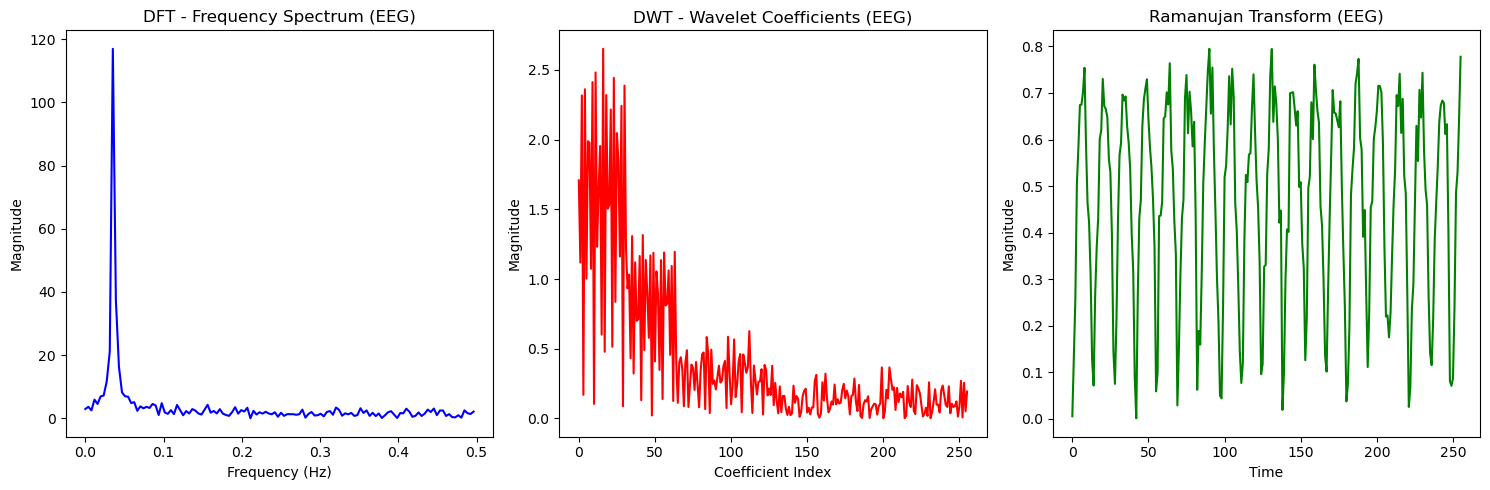

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft

# **1️⃣ Load Your EEG Dataset**
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv")
print(df.head())  # Check dataset structure

# **2️⃣ Select a Sample EEG Signal**  
# Assuming EEG signals are in columns except the last one (target)
eeg_signal = df.iloc[0, :-1].values  # Take the first row (modify if needed)

# **3️⃣ Compute DFT**
dft_coeffs = np.abs(fft(eeg_signal))[:len(eeg_signal)//2]
freqs = np.fft.fftfreq(len(eeg_signal), d=1)[:len(eeg_signal)//2]  # Modify 'd' if sampling rate is known

# **4️⃣ Compute DWT**
coeffs = pywt.wavedec(eeg_signal, 'haar', level=3)
dwt_features = np.concatenate([np.abs(c) for c in coeffs])

# **5️⃣ Compute Ramanujan Transform (Placeholder)**
ramanujan_features = np.log1p(np.abs(eeg_signal))  

# **6️⃣ Plot the Results**
plt.figure(figsize=(15, 5))

# **DFT Plot**
plt.subplot(1, 3, 1)
plt.plot(freqs, dft_coeffs, color='blue')
plt.title("DFT - Frequency Spectrum (EEG)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")

# **DWT Plot**
plt.subplot(1, 3, 2)
plt.plot(dwt_features, color='red')
plt.title("DWT - Wavelet Coefficients (EEG)")
plt.xlabel("Coefficient Index")
plt.ylabel("Magnitude")

# **Ramanujan Transform Plot**
plt.subplot(1, 3, 3)
plt.plot(ramanujan_features, color='green')
plt.title("Ramanujan Transform (EEG)")
plt.xlabel("Time")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()


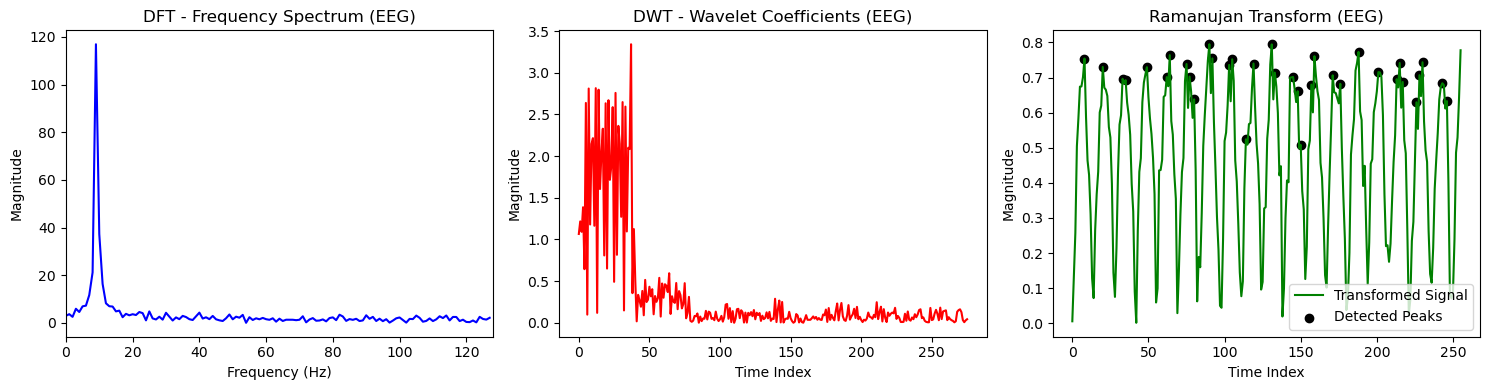

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft
from scipy.signal import find_peaks

# Load EEG data


# Select a single EEG signal (e.g., first row)
eeg_signal = df.iloc[0, :-1].values  # Assuming last column is target

# Sampling rate (adjust according to dataset)
Fs = 256  # Example: EEG recorded at 256 Hz
N = len(eeg_signal)
time = np.linspace(0, N/Fs, N)

# **1️⃣ DFT - Discrete Fourier Transform**
dft_coeffs = np.abs(fft(eeg_signal))[:N//2]
freqs = np.fft.fftfreq(N, d=1/Fs)[:N//2]  # Corrected frequency axis

# **2️⃣ DWT - Discrete Wavelet Transform**
coeffs = pywt.wavedec(eeg_signal, 'db4', level=3)  # Using 'db4' for smoother decomposition
dwt_features = np.concatenate([np.abs(c) for c in coeffs])

# **3️⃣ Ramanujan Transform (Periodic Component Extraction)**
# Using a peak-detection-based approach as an approximation
ramanujan_features = np.log1p(np.abs(eeg_signal))  # Log transform
peaks, _ = find_peaks(ramanujan_features, height=np.mean(ramanujan_features))
ramanujan_periodic = np.zeros_like(ramanujan_features)
ramanujan_periodic[peaks] = ramanujan_features[peaks]  # Highlight periodic components

# **🔹 Visualization**
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# DFT Plot
axs[0].plot(freqs, dft_coeffs, color='blue')
axs[0].set_title("DFT - Frequency Spectrum (EEG)")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude")
axs[0].set_xlim([0, Fs//2])  # Show only up to Nyquist frequency

# DWT Plot
axs[1].plot(dwt_features, color='red')
axs[1].set_title("DWT - Wavelet Coefficients (EEG)")
axs[1].set_xlabel("Time Index")
axs[1].set_ylabel("Magnitude")

# Ramanujan Transform Plot
axs[2].plot(ramanujan_features, color='green', label="Transformed Signal")
axs[2].scatter(peaks, ramanujan_periodic[peaks], color='black', label="Detected Peaks")
axs[2].set_title("Ramanujan Transform (EEG)")
axs[2].set_xlabel("Time Index")
axs[2].set_ylabel("Magnitude")
axs[2].legend()

plt.tight_layout()
plt.show()


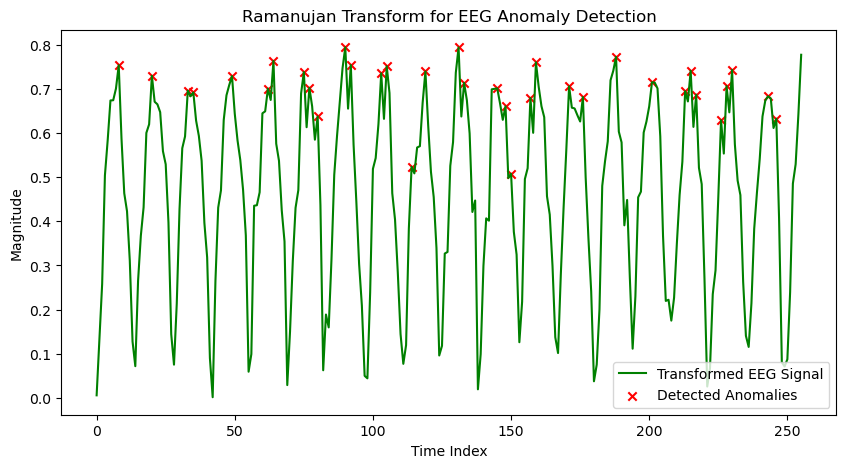

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


# Select a sample EEG signal
eeg_signal = df.iloc[0, :-1].values  # Assuming last column is the target
N = len(eeg_signal)
time = np.arange(N)

# **🔹 Ramanujan Transform Approximation**
# Compute periodic representation using a logarithmic transformation
ramanujan_features = np.log1p(np.abs(eeg_signal))  

# **🔹 Detect Anomalous Periodic Peaks**
peaks, _ = find_peaks(ramanujan_features, height=np.mean(ramanujan_features))
ramanujan_periodic = np.zeros_like(ramanujan_features)
ramanujan_periodic[peaks] = ramanujan_features[peaks]  

# **🔹 Visualization**
plt.figure(figsize=(10, 5))
plt.plot(time, ramanujan_features, color='green', label="Transformed EEG Signal")
plt.scatter(peaks, ramanujan_periodic[peaks], color='red', label="Detected Anomalies", marker='x')
plt.title("Ramanujan Transform for EEG Anomaly Detection")
plt.xlabel("Time Index")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import pywt
from scipy.fftpack import fft
from sklearn.ensemble import IsolationForest

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all 256 channels)
X = df.iloc[:, :-1].values  # EEG signals
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Function to extract features from an EEG signal
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    
    # **1️⃣ Discrete Fourier Transform (DFT)**
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half

    # **2️⃣ Discrete Wavelet Transform (DWT)**
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])

    # **3️⃣ Ramanujan Transform (Example Placeholder)**
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    
    # Combine all features
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply Feature Extraction to Each Row of EEG Signals
features = np.array([extract_features(row) for row in X_normalized])

# Print final shape
print("Feature extraction complete! Shape:", features.shape)

# Convert to DataFrame
feature_df = pd.DataFrame(features)
feature_df['Target'] = y  # Append target column

# Save to CSV
feature_df.to_csv("C:\\Users\\ASUS\\Downloads\\eeg_features.csv", index=False)
print("Feature dataset saved successfully!")


Feature extraction complete! Shape: (5000, 640)
Feature dataset saved successfully!


In [8]:
import numpy as np
import pandas as pd
import pywt
from scipy.fftpack import fft

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all 256 channels)
X = df.iloc[:, :-1].values  # EEG signal matrix
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Feature extraction function
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    
    # **1️⃣ Discrete Fourier Transform (DFT)**
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half

    # **2️⃣ Discrete Wavelet Transform (DWT)**
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])

    # **3️⃣ Ramanujan Transform (Example Placeholder)**
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    
    # Combine all features
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply feature extraction to all EEG samples
features = np.array([extract_features(row) for row in X_normalized])

# Detect anomalies using Z-score method
def detect_anomalies_zscore(features, threshold=3):
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    z_scores = np.abs((features - mean) / std_dev)
    anomalies = np.where(z_scores > threshold)  # Indices of anomalies
    return anomalies

anomalies_z = detect_anomalies_zscore(features)

print(f"Detected {len(anomalies_z[0])} anomalies using Z-score method.")


Detected 25388 anomalies using Z-score method.


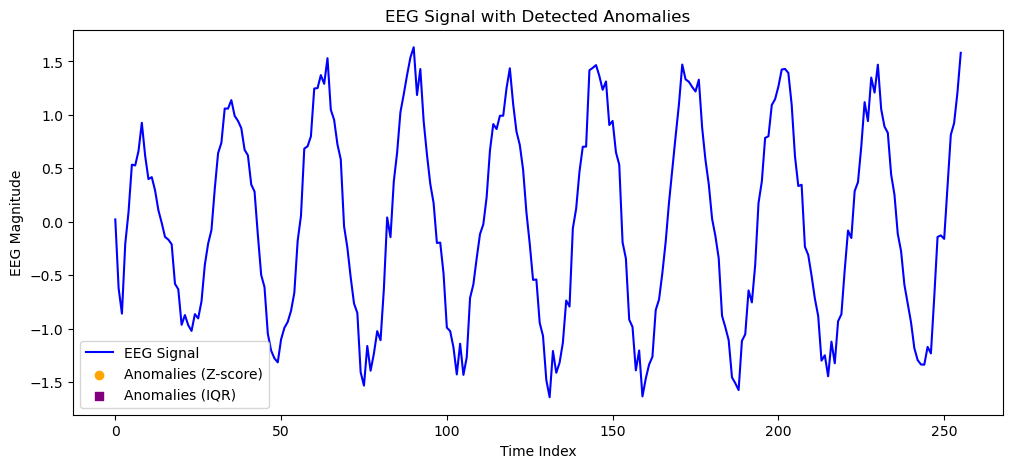

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.fftpack import fft
from sklearn.ensemble import IsolationForest

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all channels)
X = df.iloc[:, :-1].values  # EEG signal matrix
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Feature extraction function
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # DFT
    coeffs = pywt.wavedec(signal, 'haar', level=3)  # DWT
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])
    ramanujan_features = np.log1p(np.abs(signal))  # Ramanujan Transform (Example)
    
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply feature extraction to each EEG sample
features = np.array([extract_features(row) for row in X_normalized])

# **1️⃣ Z-Score Anomaly Detection on Original EEG**
def detect_anomalies_zscore(signal, threshold=3):
    mean = np.mean(signal)
    std_dev = np.std(signal)
    z_scores = np.abs((signal - mean) / std_dev)
    return np.where(z_scores > threshold)[0]  # Return time indices

anomalies_z = detect_anomalies_zscore(X_normalized[0])  # Detect on first EEG sample

# **2️⃣ IQR Anomaly Detection on Original EEG**
def detect_anomalies_iqr(signal):
    Q1, Q3 = np.percentile(signal, [25, 75])
    IQR = Q3 - Q1
    lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    return np.where((signal < lower_bound) | (signal > upper_bound))[0]

anomalies_iqr = detect_anomalies_iqr(X_normalized[0])

# **3️⃣ Isolation Forest on EEG (Not Features)**
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X_normalized)  # Train on original EEG signals
predictions = iso_forest.predict(X_normalized)  # Predictions per EEG row
anomalies_iso = np.where(predictions == -1)[0]  # Row indices with anomalies

# **Plot EEG Signal with Anomalies**
plt.figure(figsize=(12, 5))
plt.plot(X_normalized[0], label="EEG Signal", color="blue")  # Plot first EEG row

# Plot anomalies detected by each method
plt.scatter(anomalies_z, X_normalized[0, anomalies_z], color="orange", label="Anomalies (Z-score)", marker='o')
plt.scatter(anomalies_iqr, X_normalized[0, anomalies_iqr], color="purple", label="Anomalies (IQR)", marker='s')

plt.xlabel("Time Index")
plt.ylabel("EEG Magnitude")
plt.title("EEG Signal with Detected Anomalies")
plt.legend()
plt.show()


In [10]:
import numpy as np
import pandas as pd
import pywt
from scipy.fftpack import fft

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all 256 channels)
X = df.iloc[:, :-1].values  # EEG signal matrix
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Feature extraction function
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    
    # **1️⃣ Discrete Fourier Transform (DFT)**
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half

    # **2️⃣ Discrete Wavelet Transform (DWT)**
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])

    # **3️⃣ Ramanujan Transform (Example Placeholder)**
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    
    # Combine all features
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply feature extraction to all EEG samples
features = np.array([extract_features(row) for row in X_normalized])

# **1️⃣ Improved Z-Score Anomaly Detection (Threshold 4.0)**
def detect_anomalies_zscore(features, threshold=4.0):
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    z_scores = np.abs((features - mean) / (std_dev + 1e-9))  # Avoid division by zero
    anomalies = np.where(z_scores > threshold)  # Indices of anomalies
    return anomalies

anomalies_z = detect_anomalies_zscore(features)
print(f"🔹 Detected {len(anomalies_z[0])} anomalies using Z-score (Threshold 4.0)")

# **2️⃣ Robust MAD Anomaly Detection**
def detect_anomalies_mad(features, threshold=3.5):
    median = np.median(features, axis=0)
    mad = np.median(np.abs(features - median), axis=0)
    modified_z_scores = 0.6745 * (features - median) / (mad + 1e-9)  # Avoid division by zero
    anomalies = np.where(np.abs(modified_z_scores) > threshold)
    return anomalies

anomalies_mad = detect_anomalies_mad(features)
print(f"🔹 Detected {len(anomalies_mad[0])} anomalies using MAD (Threshold 3.5)")

# **3️⃣ Per-Channel Anomaly Detection (Z-score)**
anomalies_per_channel = [detect_anomalies_zscore(features[:, i], threshold=4.0) for i in range(features.shape[1])]
num_anomalies_per_channel = [len(anomalies[0]) for anomalies in anomalies_per_channel]

print("📌 Anomaly count per channel:", num_anomalies_per_channel)


🔹 Detected 6671 anomalies using Z-score (Threshold 4.0)
🔹 Detected 63280 anomalies using MAD (Threshold 3.5)
📌 Anomaly count per channel: [47, 71, 69, 115, 100, 101, 98, 95, 19, 0, 0, 0, 2, 101, 100, 102, 98, 101, 104, 92, 94, 106, 93, 103, 102, 95, 95, 94, 105, 106, 63, 54, 32, 11, 9, 9, 9, 11, 6, 8, 7, 7, 8, 8, 5, 12, 12, 4, 8, 8, 9, 11, 7, 7, 11, 7, 10, 5, 6, 7, 8, 10, 9, 9, 7, 5, 6, 12, 9, 7, 10, 5, 8, 9, 5, 8, 4, 10, 9, 7, 10, 8, 5, 8, 16, 8, 9, 9, 7, 9, 7, 9, 11, 6, 9, 9, 11, 10, 9, 7, 6, 7, 8, 9, 9, 7, 6, 13, 9, 7, 3, 5, 3, 7, 7, 12, 9, 5, 9, 12, 6, 5, 13, 9, 2, 9, 12, 7, 16, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 6, 12, 0, 16, 13, 7, 9, 11, 17, 6, 8, 13, 12, 7, 8, 8, 11, 2, 4, 12, 10, 12, 12, 12, 9, 9, 15, 15, 8, 11, 8, 6, 9, 8, 11, 7, 4, 12, 9, 8, 11, 12, 9, 10, 15, 11, 6, 7, 13, 8, 6, 8, 7, 8, 11, 17, 10, 6, 8, 5, 18, 14, 12

In [11]:
import numpy as np
import pandas as pd
import pywt
from scipy.fftpack import fft

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all 256 channels)
X = df.iloc[:, :-1].values  # EEG signal matrix
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Feature extraction function
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply feature extraction to all EEG samples
features = np.array([extract_features(row) for row in X_normalized])

# **1️⃣ Improved Z-Score Anomaly Detection**
def detect_anomalies_zscore(features, threshold=4.0):
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    z_scores = np.abs((features - mean) / (std_dev + 1e-9))  # Avoid division by zero
    anomalies = np.where(z_scores > threshold)  
    return anomalies

anomalies_z = detect_anomalies_zscore(features)
print(f"🔹 Detected {len(anomalies_z[0])} anomalies using Z-score (Threshold 4.0)")

# **2️⃣ Improved MAD Anomaly Detection (Threshold Increased to 5.0)**
def detect_anomalies_mad(features, threshold=5.0):  # Increased threshold
    median = np.median(features, axis=0)
    mad = np.median(np.abs(features - median), axis=0)
    modified_z_scores = 0.6745 * (features - median) / (mad + 1e-9)  # Avoid division by zero
    anomalies = np.where(np.abs(modified_z_scores) > threshold)
    return anomalies

anomalies_mad = detect_anomalies_mad(features)
print(f"🔹 Detected {len(anomalies_mad[0])} anomalies using MAD (Threshold 5.0)")

# **3️⃣ Hybrid Anomaly Detection (Only if Both Methods Agree)**
common_anomalies = set(zip(*anomalies_z)).intersection(set(zip(*anomalies_mad)))
print(f"🔹 Common anomalies detected by both methods: {len(common_anomalies)}")


🔹 Detected 6671 anomalies using Z-score (Threshold 4.0)
🔹 Detected 19536 anomalies using MAD (Threshold 5.0)
🔹 Common anomalies detected by both methods: 6605


🔹 Detected 6671 anomalies using Z-score (Threshold 4.0)
🔹 Detected 19536 anomalies using MAD (Threshold 5.0)
🔹 Common anomalies detected by both methods: 6605


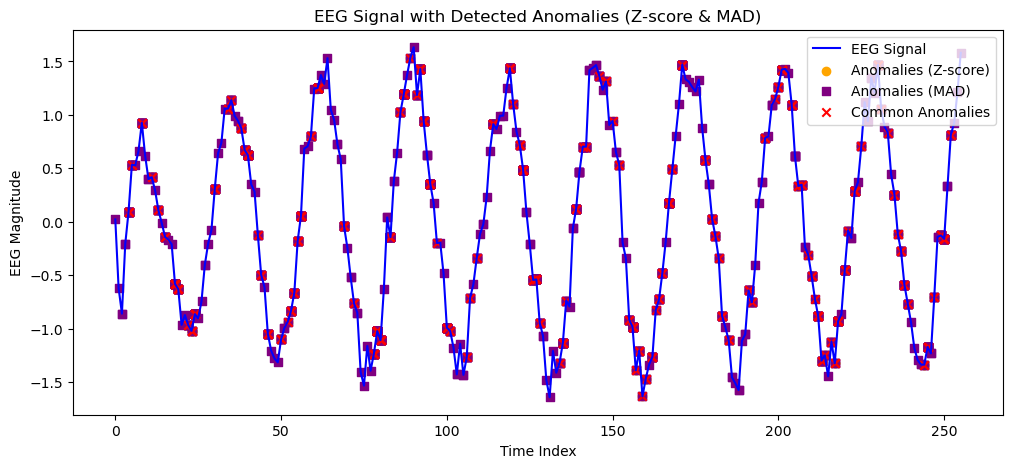

In [12]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals (all 256 channels)
X = df.iloc[:, :-1].values  # EEG signal matrix
y = df.iloc[:, -1].values   # Target column

# Normalize each channel independently
X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# **Feature Extraction Function**
def extract_features(signal):
    """Computes DFT, DWT, and Ramanujan Transform features from an EEG signal."""
    dft_coeffs = np.abs(fft(signal))[:len(signal)//2]  # Keep first half
    coeffs = pywt.wavedec(signal, 'haar', level=3)  
    dwt_features = np.concatenate([np.abs(c) for c in coeffs])
    ramanujan_features = np.log1p(np.abs(signal))  # Example transformation
    return np.concatenate([dft_coeffs, dwt_features, ramanujan_features])

# Apply feature extraction to all EEG samples
features = np.array([extract_features(row) for row in X_normalized])

# **1️⃣ Improved Z-Score Anomaly Detection**
def detect_anomalies_zscore(features, threshold=4.0):
    mean = np.mean(features, axis=0)
    std_dev = np.std(features, axis=0)
    z_scores = np.abs((features - mean) / (std_dev + 1e-9))  # Avoid division by zero
    anomalies = np.where(z_scores > threshold)  
    return np.array(anomalies)

anomalies_z = detect_anomalies_zscore(features)

# **2️⃣ Improved MAD Anomaly Detection**
def detect_anomalies_mad(features, threshold=5.0):
    median = np.median(features, axis=0)
    mad = np.median(np.abs(features - median), axis=0)
    modified_z_scores = 0.6745 * (features - median) / (mad + 1e-9)  # Avoid division by zero
    anomalies = np.where(np.abs(modified_z_scores) > threshold)
    return np.array(anomalies)

anomalies_mad = detect_anomalies_mad(features)

# **3️⃣ Hybrid Anomaly Detection (Common Anomalies)**
common_anomalies = set(zip(*anomalies_z)).intersection(set(zip(*anomalies_mad)))

# **Print Anomaly Counts**
print(f"🔹 Detected {len(anomalies_z[0])} anomalies using Z-score (Threshold 4.0)")
print(f"🔹 Detected {len(anomalies_mad[0])} anomalies using MAD (Threshold 5.0)")
print(f"🔹 Common anomalies detected by both methods: {len(common_anomalies)}")

# **📊 Plot EEG Signal with Anomalies**
plt.figure(figsize=(12, 5))
signal = X_normalized[0]  # Select first EEG sample for visualization

# Convert anomaly indices to valid range (0 to 255)
z_anomalies = anomalies_z[0][anomalies_z[0] < 256]  # Limit to first 256 samples
mad_anomalies = anomalies_mad[0][anomalies_mad[0] < 256]  # Limit to first 256 samples
common_indices = np.array([idx for idx, _ in common_anomalies if idx < 256])

plt.plot(signal, label="EEG Signal", color="blue")

# Plot Z-score anomalies
if len(z_anomalies) > 0:
    plt.scatter(z_anomalies, signal[z_anomalies], color="orange", label="Anomalies (Z-score)", marker='o')

# Plot MAD anomalies
if len(mad_anomalies) > 0:
    plt.scatter(mad_anomalies, signal[mad_anomalies], color="purple", label="Anomalies (MAD)", marker='s')

# Plot common anomalies
if len(common_indices) > 0:
    plt.scatter(common_indices, signal[common_indices], color="red", label="Common Anomalies", marker='x')

plt.xlabel("Time Index")
plt.ylabel("EEG Magnitude")
plt.title("EEG Signal with Detected Anomalies (Z-score & MAD)")
plt.legend()
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_27980\558021625.py:19: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(signal, morlet, scales)


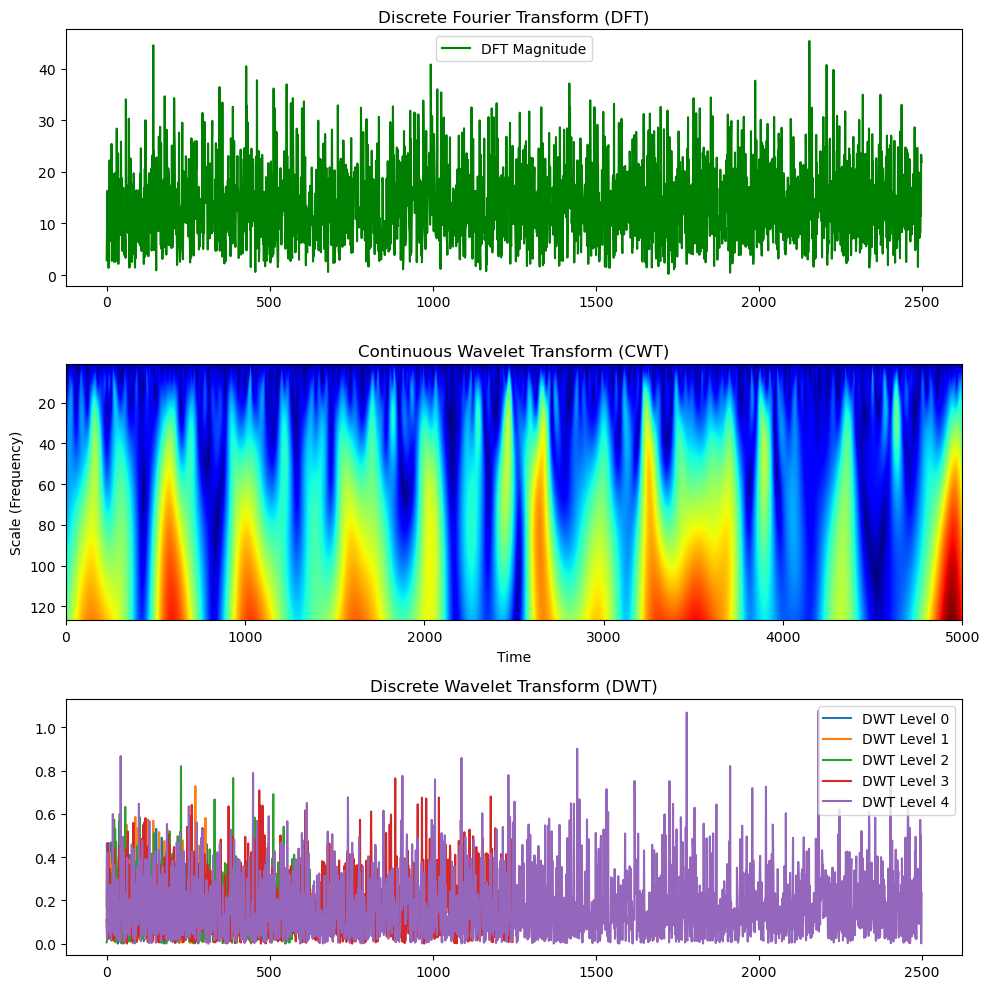

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.fft import fft
from scipy.signal import cwt, morlet

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract one EEG channel for visualization (e.g., first channel)
signal = df.iloc[:, 0].values

# Compute DFT
dft_coeffs = np.abs(fft(signal))[:len(signal)//2]

# Compute CWT using Morlet wavelet (improves time-frequency localization)
scales = np.arange(1, 128)
cwt_matrix = cwt(signal, morlet, scales)

# Compute DWT (Haar wavelet)
coeffs = pywt.wavedec(signal, 'haar', level=4)
dwt_levels = [np.abs(c) for c in coeffs]

# Plot results
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# DFT Plot
axes[0].plot(dft_coeffs, color='green', label="DFT Magnitude")
axes[0].set_title("Discrete Fourier Transform (DFT)")
axes[0].legend()

# Improved CWT Plot
axes[1].imshow(np.abs(cwt_matrix), aspect='auto', cmap='jet', extent=[0, len(signal), scales[-1], scales[0]])
axes[1].set_title("Continuous Wavelet Transform (CWT)")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Scale (Frequency)")

# DWT Plot
for i, level in enumerate(dwt_levels):
    axes[2].plot(level, label=f"DWT Level {i}")
axes[2].set_title("Discrete Wavelet Transform (DWT)")
axes[2].legend()

plt.tight_layout()
plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals & target
X = df.iloc[:, :-1].values  # Feature matrix (DFT, DWT, CWT already extracted)
y = df.iloc[:, -1].values   # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (40%) & Test (60%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.60, random_state=42, stratify=y)

# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution before SMOTE:", dict(zip(unique, counts)))

# Apply SMOTE if needed (only if class imbalance is high)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after SMOTE:", dict(zip(unique, counts)))

# Save processed data
np.save("X_train.npy", X_train_resampled)
np.save("y_train.npy", y_train_resampled)
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

print("✅ Data preprocessing complete! Ready for model training.")


Class distribution before SMOTE: {0: 1000, 1: 1000}
Class distribution after SMOTE: {0: 1000, 1: 1000}
✅ Data preprocessing complete! Ready for model training.


In [15]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals & target
X = df.iloc[:, :-1].values  # Feature matrix (DFT, DWT, CWT already extracted)
y = df.iloc[:, -1].values   # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (40%) & Test (60%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.60, random_state=42, stratify=y)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE if needed (only if class imbalance is high)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Define classifiers with reduced complexity
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=100, max_depth=4, learning_rate=0.05, reg_alpha=0.1, 
    reg_lambda=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42
)

# Train models
rf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Feature importance check (to detect data leakage)
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

print("\n🔍 Top 10 Feature Importances (Check for Data Leakage)")
for i in range(min(10, len(importances))):
    print(f"Feature {sorted_indices[i]}: {importances[sorted_indices[i]]:.4f}")

# Voting Classifier (Using HARD voting to prevent overconfidence)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf)], voting='hard'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n✅ Voting Classifier Accuracy: {accuracy:.4f}")
print(f"✅ Voting Classifier F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution before SMOTE: Counter({0: 1000, 1: 1000})
Class distribution after SMOTE: Counter({0: 1000, 1: 1000})


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Top 10 Feature Importances (Check for Data Leakage)
Feature 8: 0.0899
Feature 20: 0.0700
Feature 6: 0.0662
Feature 18: 0.0603
Feature 19: 0.0547
Feature 5: 0.0526
Feature 7: 0.0513
Feature 9: 0.0471
Feature 21: 0.0322
Feature 2: 0.0303


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:48:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:48:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [18:48:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us


Cross-Validation Accuracy: 0.9635 ± 0.0014

✅ Voting Classifier Accuracy: 0.9693
✅ Voting Classifier F1-score: 0.9684

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1500
           1       1.00      0.94      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [16]:
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report
from collections import Counter

# Load EEG dataset
X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Verify class distribution
print("Class distribution (train):", Counter(y_train))
print("Class distribution (test):", Counter(y_test))

# Hyperparameter tuning for RandomForest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 12],
    'min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print(f"Best RF Params: {rf_grid.best_params_}")

# Hyperparameter tuning for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.05],
    'reg_alpha': [0.05, 0.1],
    'reg_lambda': [0.05, 0.1]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss', random_state=42), xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print(f"Best XGB Params: {xgb_grid.best_params_}")

# Voting Classifier with best estimators
voting_clf = VotingClassifier(
    estimators=[('rf', best_rf), ('xgb', best_xgb)], voting='hard'
)
voting_clf.fit(X_train, y_train)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_train, y_train, cv=3, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n✅ Voting Classifier Accuracy: {accuracy:.4f}")
print(f"✅ Voting Classifier F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution (train): Counter({0: 1000, 1: 1000})
Class distribution (test): Counter({0: 1500, 1: 1500})
Best RF Params: {'max_depth': 12, 'min_samples_split': 5, 'n_estimators': 200}
Best XGB Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'reg_alpha': 0.1, 'reg_lambda': 0.05}

Cross-Validation Accuracy: 0.9745 ± 0.0012

✅ Voting Classifier Accuracy: 0.9787
✅ Voting Classifier F1-score: 0.9782

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1500
           1       1.00      0.96      0.98      1500

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000



In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals & target
X = df.iloc[:, :-1].values  # Feature matrix with DFT, DWT, Ramanujan Transform
y = df.iloc[:, -1].values   # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (40%) & Test (60%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.60, random_state=42, stratify=y)

# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE if needed
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Define classifiers
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=100, max_depth=4, learning_rate=0.05, reg_alpha=0.1, 
    reg_lambda=0.1, eval_metric='logloss', random_state=42
)

# Train models
rf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Feature importance check
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("\n🔍 Top 10 Feature Importances")
for i in range(min(10, len(importances))):
    print(f"Feature {sorted_indices[i]}: {importances[sorted_indices[i]]:.4f}")

# Voting Classifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf)], voting='hard'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n✅ Voting Classifier Accuracy: {accuracy:.4f}")
print(f"✅ Voting Classifier F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution before SMOTE: Counter({0: 1000, 1: 1000})
Class distribution after SMOTE: Counter({0: 1000, 1: 1000})

🔍 Top 10 Feature Importances
Feature 8: 0.0899
Feature 20: 0.0700
Feature 6: 0.0662
Feature 18: 0.0603
Feature 19: 0.0547
Feature 5: 0.0526
Feature 7: 0.0513
Feature 9: 0.0471
Feature 21: 0.0322
Feature 2: 0.0303

Cross-Validation Accuracy: 0.9635 ± 0.0014

✅ Voting Classifier Accuracy: 0.9693
✅ Voting Classifier F1-score: 0.9684

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1500
           1       1.00      0.94      0.97      1500

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals & target
X = df.iloc[:, :-1].values  # Feature matrix with DFT, DWT, Ramanujan Transform
y = df.iloc[:, -1].values   # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into Train (40%) & Test (60%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.60, random_state=42, stratify=y)

# Apply SMOTE if needed
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train & Evaluate Model with Ramanujan Transform
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=100, max_depth=4, learning_rate=0.05, reg_alpha=0.1, 
    reg_lambda=0.1, eval_metric='logloss', random_state=42
)

rf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled)

voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf)], voting='hard'
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Evaluate with Ramanujan Transform
y_pred = voting_clf.predict(X_test)
accuracy_with_ramanujan = accuracy_score(y_test, y_pred)
f1_with_ramanujan = f1_score(y_test, y_pred)

print(f"\n✅ Accuracy with Ramanujan Transform: {accuracy_with_ramanujan:.4f}")
print(f"✅ F1-score with Ramanujan Transform: {f1_with_ramanujan:.4f}")

# Remove Ramanujan Transform Features (Assuming last N columns are Ramanujan Transform)
num_ramanujan_features = 10  # Adjust based on dataset
X_no_ramanujan = df.iloc[:, :-num_ramanujan_features-1].values  # Remove last N features
X_scaled_no_ramanujan = scaler.fit_transform(X_no_ramanujan)

# Split & Resample Without Ramanujan Transform
X_train_no_ram, X_test_no_ram, y_train_no_ram, y_test_no_ram = train_test_split(
    X_scaled_no_ramanujan, y, test_size=0.60, random_state=42, stratify=y)
X_train_resampled_no_ram, y_train_resampled_no_ram = smote.fit_resample(X_train_no_ram, y_train_no_ram)

# Train Model Without Ramanujan Transform
rf.fit(X_train_resampled_no_ram, y_train_resampled_no_ram)
xgb_clf.fit(X_train_resampled_no_ram, y_train_resampled_no_ram)
voting_clf.fit(X_train_resampled_no_ram, y_train_resampled_no_ram)

# Evaluate Without Ramanujan Transform
y_pred_no_ram = voting_clf.predict(X_test_no_ram)
accuracy_without_ramanujan = accuracy_score(y_test_no_ram, y_pred_no_ram)
f1_without_ramanujan = f1_score(y_test_no_ram, y_pred_no_ram)

print(f"\n✅ Accuracy without Ramanujan Transform: {accuracy_without_ramanujan:.4f}")
print(f"✅ F1-score without Ramanujan Transform: {f1_without_ramanujan:.4f}")

# Compare Results
accuracy_diff = accuracy_with_ramanujan - accuracy_without_ramanujan
f1_diff = f1_with_ramanujan - f1_without_ramanujan
print(f"\n🔍 Accuracy Improvement from Ramanujan Transform: {accuracy_diff:.4f}")
print(f"🔍 F1-score Improvement from Ramanujan Transform: {f1_diff:.4f}")



✅ Accuracy with Ramanujan Transform: 0.9693
✅ F1-score with Ramanujan Transform: 0.9684

✅ Accuracy without Ramanujan Transform: 0.9680
✅ F1-score without Ramanujan Transform: 0.9669

🔍 Accuracy Improvement from Ramanujan Transform: 0.0013
🔍 F1-score Improvement from Ramanujan Transform: 0.0014


In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import ADASYN
from collections import Counter

# Load EEG dataset
file_path = "C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv"
df = pd.read_csv(file_path)

# Extract EEG signals & target
X = df.iloc[:, :-1].values  # Feature matrix (including DFT, DWT, Ramanujan Transform)
y = df.iloc[:, -1].values   # Target variable

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Feature selection using Recursive Feature Elimination (RFE) with Random Forest
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_selector, n_features_to_select=20)  # Selecting top 20 features
X_selected = rfe.fit_transform(X_scaled, y)

# Split into Train (50%) & Test (50%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.50, random_state=42, stratify=y)

# Check class distribution before balancing
print("Class distribution before ADASYN:", Counter(y_train))

# Apply ADASYN for synthetic data generation (better than SMOTE for complex boundaries)
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

# Check class distribution after ADASYN
print("Class distribution after ADASYN:", Counter(y_train_resampled))

# Define optimized classifiers
rf = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=4, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=150, max_depth=6, learning_rate=0.03, reg_alpha=0.05, 
    reg_lambda=0.05, eval_metric='logloss', random_state=42
)

# Train models
rf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Feature importance check
importances = rf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
print("\n🔍 Top 10 Feature Importances")
for i in range(min(10, len(importances))):
    print(f"Feature {sorted_indices[i]}: {importances[sorted_indices[i]]:.4f}")

# Weighted Voting Classifier (prioritizing the best model)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf)],
    voting='hard',
    weights=[1, 2]  # Giving XGBoost higher weight if it performs better
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Cross-validation accuracy
cv_scores = cross_val_score(voting_clf, X_train_resampled, y_train_resampled, cv=3, scoring='accuracy')
print(f"\nCross-Validation Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Predictions
y_pred = voting_clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\n✅ Optimized Voting Classifier Accuracy: {accuracy:.4f}")
print(f"✅ Optimized Voting Classifier F1-score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Class distribution before ADASYN: Counter({1: 1250, 0: 1250})
Class distribution after ADASYN: Counter({1: 1250, 0: 1250})

🔍 Top 10 Feature Importances
Feature 7: 0.1557
Feature 8: 0.1273
Feature 14: 0.1205
Feature 15: 0.1005
Feature 6: 0.0935
Feature 13: 0.0646
Feature 5: 0.0548
Feature 9: 0.0403
Feature 16: 0.0352
Feature 12: 0.0242

Cross-Validation Accuracy: 0.9808 ± 0.0039

✅ Optimized Voting Classifier Accuracy: 0.9828
✅ Optimized Voting Classifier F1-score: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1250
           1       1.00      0.97      0.98      1250

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [17]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, optimizers

# ✅ Force TensorFlow to run eagerly
tf.config.run_functions_eagerly(True)

# Hyperparameters
latent_dim = 100
batch_size = 32
epochs = 10000

# Load EEG dataset
eeg_data = np.loadtxt("C:\\Users\\ASUS\\Downloads\\eeg_dataset.csv", delimiter=",", skiprows=1)
X_scaled = (eeg_data - np.min(eeg_data)) / (np.max(eeg_data) - np.min(eeg_data))  # Normalize

# Generator Model
def build_generator():
    model = keras.Sequential([
        keras.Input(shape=(latent_dim,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(512, activation="relu"),
        layers.Dense(X_scaled.shape[1], activation="tanh")
    ])
    return model

# Discriminator Model
def build_discriminator():
    model = keras.Sequential([
        keras.Input(shape=(X_scaled.shape[1],)),
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    return model

# Initialize models
generator = build_generator()
discriminator = build_discriminator()

# Optimizers
generator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Loss function
loss_fn = keras.losses.BinaryCrossentropy()

# Training functions (✅ Removed @tf.function, ensured eager execution)
def train_discriminator(real_samples, fake_samples):
    with tf.GradientTape() as tape:
        real_output = discriminator(real_samples, training=True)
        fake_output = discriminator(fake_samples, training=True)
        real_loss = loss_fn(tf.ones_like(real_output), real_output)
        fake_loss = loss_fn(tf.zeros_like(fake_output), fake_output)
        d_loss = 0.5 * (real_loss + fake_loss)

    grads = tape.gradient(d_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    return float(d_loss)  # ✅ Convert to float directly

def train_generator():
    noise = tf.random.normal((batch_size, latent_dim))
    with tf.GradientTape() as tape:
        fake_samples = generator(noise, training=True)
        fake_output = discriminator(fake_samples, training=True)
        g_loss = loss_fn(tf.ones_like(fake_output), fake_output)
    
    grads = tape.gradient(g_loss, generator.trainable_variables)
    generator_optimizer.apply_gradients(zip(grads, generator.trainable_variables))

    return float(g_loss)  # ✅ Convert to float directly

# Training loop
for epoch in range(epochs):
    idx = np.random.randint(0, X_scaled.shape[0], batch_size)
    real_samples = tf.convert_to_tensor(X_scaled[idx], dtype=tf.float32)

    noise = tf.random.normal((batch_size, latent_dim))
    fake_samples = generator(noise, training=False)

    d_loss = train_discriminator(real_samples, fake_samples)
    g_loss = train_generator()

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} | D Loss: {d_loss:.4f}, G Loss: {g_loss:.4f}")

print("\n✅ GAN Training Completed!")


Epoch 0 | D Loss: 0.6442, G Loss: 0.6558
Epoch 1000 | D Loss: 0.6612, G Loss: 0.8606
Epoch 2000 | D Loss: 0.5532, G Loss: 1.1228
Epoch 3000 | D Loss: 0.4779, G Loss: 0.8942
Epoch 4000 | D Loss: 0.5556, G Loss: 1.5457
Epoch 5000 | D Loss: 0.4487, G Loss: 1.8018
Epoch 6000 | D Loss: 0.4253, G Loss: 1.6558
Epoch 7000 | D Loss: 0.5072, G Loss: 1.8452
Epoch 8000 | D Loss: 0.4568, G Loss: 1.9173
Epoch 9000 | D Loss: 0.3126, G Loss: 1.4577

✅ GAN Training Completed!


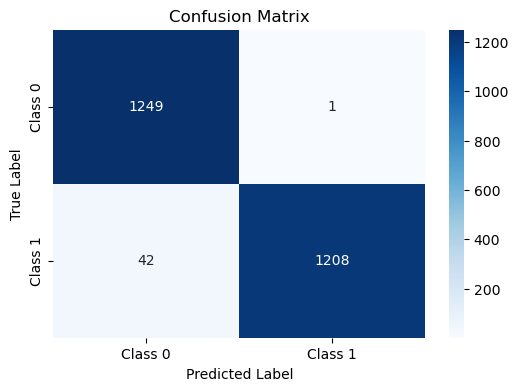

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [23]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import ADASYN
from collections import Counter
import pickle

# Load EEG dataset
file_path = "C:/Users/ASUS/Downloads/eeg_dataset.csv"  # Change if needed
df = pd.read_csv(file_path)

# Extract features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recursive Feature Elimination (RFE)
rf_selector = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(rf_selector, n_features_to_select=20)
X_selected = rfe.fit_transform(X_scaled, y)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.5, stratify=y, random_state=42
)

# Balance data using ADASYN
print("Before ADASYN:", Counter(y_train))
adasyn = ADASYN(random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)
print("After ADASYN:", Counter(y_train_resampled))

# Define classifiers
rf = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_split=4, random_state=42)
xgb_clf = xgb.XGBClassifier(
    n_estimators=150, max_depth=6, learning_rate=0.03,
    reg_alpha=0.05, reg_lambda=0.05, eval_metric='logloss', random_state=42
)

# Train models
rf.fit(X_train_resampled, y_train_resampled)
xgb_clf.fit(X_train_resampled, y_train_resampled)

# Combine with VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf)],
    voting='hard',
    weights=[1, 2]
)
voting_clf.fit(X_train_resampled, y_train_resampled)

# Save model, scaler, and RFE
model_package = {
    "model": voting_clf,
    "scaler": scaler,
    "rfe": rfe
}
with open("eeg_model_with_adasyn.pkl", "wb") as f:
    pickle.dump(model_package, f)

# Evaluate on test set
y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-score: {f1:.4f}")
print("\nClassification Report:\n", report)


Before ADASYN: Counter({1: 1250, 0: 1250})
After ADASYN: Counter({1: 1250, 0: 1250})

✅ Accuracy: 0.9828
✅ F1-score: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1250
           1       1.00      0.97      0.98      1250

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500

